# Extracting patches from big biopsy images

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [4]:
Image.MAX_IMAGE_PIXELS = None
im = Image.open('/fhome/gia05/project/B22-25-HP.tiff')

new_width = int(im.width * 0.1)
new_height = int(im.height * 0.1)

rescaled_im = im.resize((new_width, new_height))
rescaled_im.save('rescaled_image.tiff')

im.close()

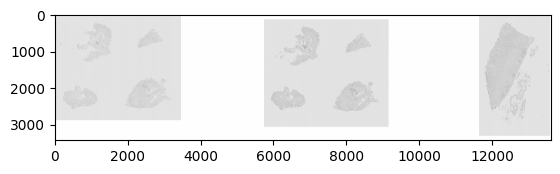

In [2]:
# Reading the rescaled image

image = cv2.imread("rescaled_image.tiff")
img_GRAY = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(img_GRAY, cmap='gray', vmin=0, vmax=255)
plt.show()

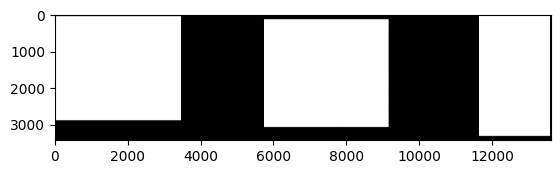

In [3]:
#Binary threshold to detect each image

_, binary_thres = cv2.threshold(img_GRAY, 250, 255, cv2.THRESH_BINARY)
not_binary_thres = cv2.bitwise_not(binary_thres)

plt.imshow(not_binary_thres, cmap='gray', vmin=0, vmax=255)
plt.show()

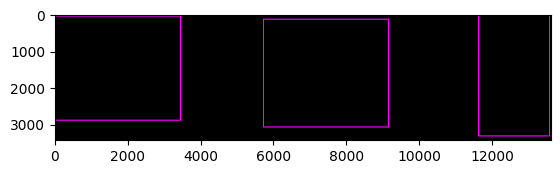

3


In [4]:
# Find the contours of every image to crop and manipulate them in a separate way

contours, hierarchy = cv2.findContours(not_binary_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = [contour for contour in contours if cv2.contourArea(contour) > 0.0 ] 

contour_image = np.zeros_like(image)
cv2.drawContours(contour_image, selected_contours, -1, (255, 0, 255), 30)  

plt.imshow(contour_image)
plt.show()

print(len(selected_contours))

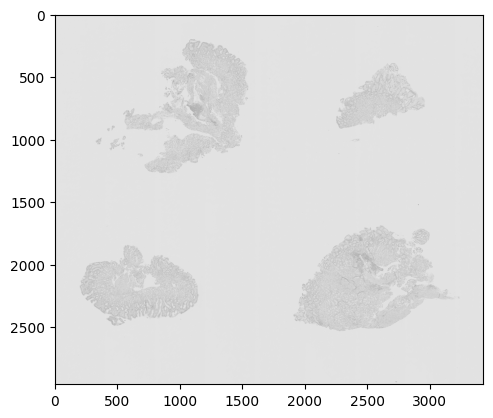

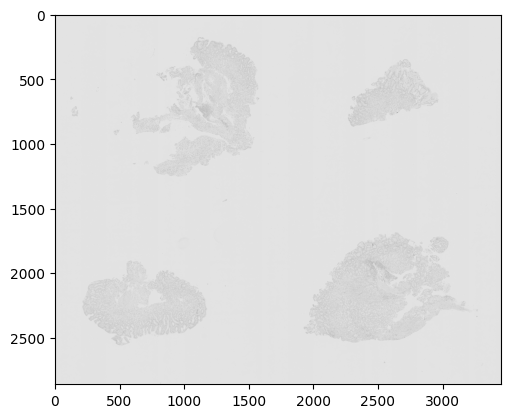

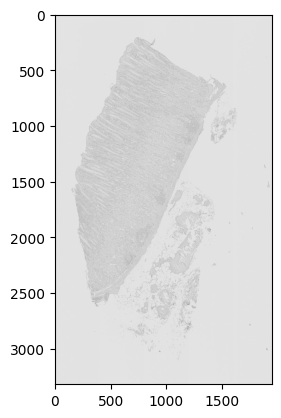

In [5]:
images = [] # Save images here

for contour in selected_contours:

    x, y, w, h = cv2.boundingRect(contour)

    new_image = img_GRAY[y:y+h, x:x+w]

    images.append(new_image)

    plt.imshow(new_image, cmap='gray', vmin=0, vmax=255)
    plt.show()

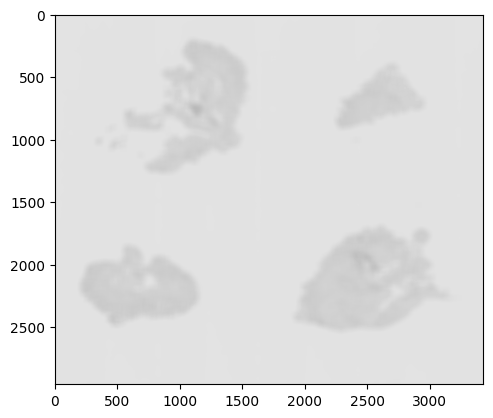

In [6]:
# Step 1: Reduce Noise

blurred = cv2.blur(images[0], (60,60)) # First, reduce noise...

plt.imshow(blurred, cmap='gray', vmin=0, vmax=255)
plt.show()

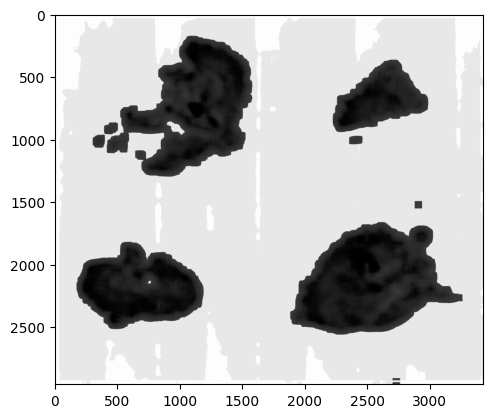

In [7]:
# Step 2: Increase the contrast

adjusted_image = cv2.equalizeHist(blurred, )

plt.imshow(adjusted_image, cmap='gray', vmin=0, vmax=255)
plt.show()

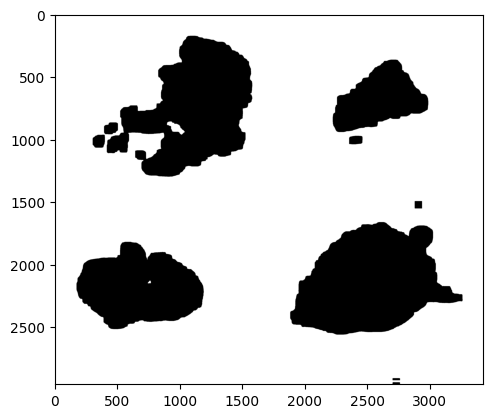

In [8]:
# Step 3: Binary threshold to detect each 'object'

_, binary_image = cv2.threshold(adjusted_image, 220, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.show()

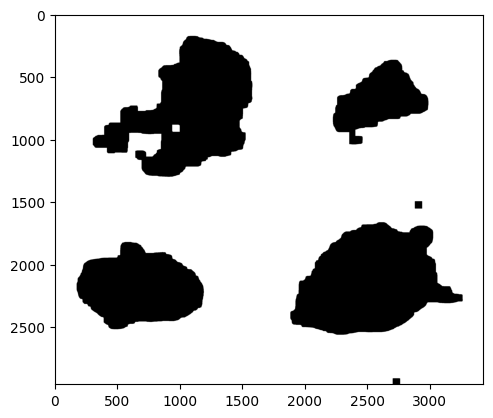

In [9]:
# Step 4: Opening operation to remove the holes

kernel = np.ones((50, 50), np.uint8)

opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray', vmin=0, vmax=255)
plt.show()

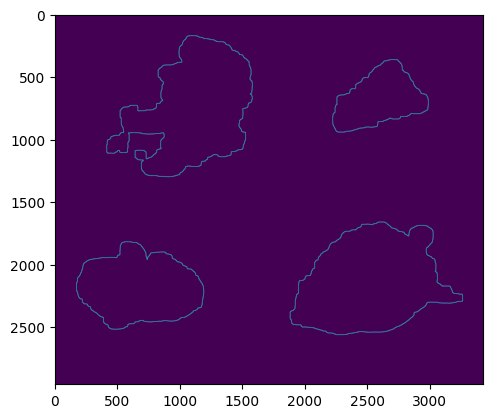

In [10]:
# Step 5: Find the contours

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# We will discard those contours that are too small or large:
selected_contours = [contour for contour in contours if cv2.contourArea(contour) > 10000 and cv2.contourArea(contour) < 2500000] # Only select the big ones

contour_image = np.zeros_like(binary_image)
cv2.drawContours(contour_image, selected_contours, -1, (255, 0, 255), 2)  

plt.imshow(contour_image)
plt.show()

In [11]:
len(selected_contours) # The length should be 4

4

In [12]:
output_dir = "CroppedImages/"
os.chdir(output_dir) # Go to the file where we want to store the images

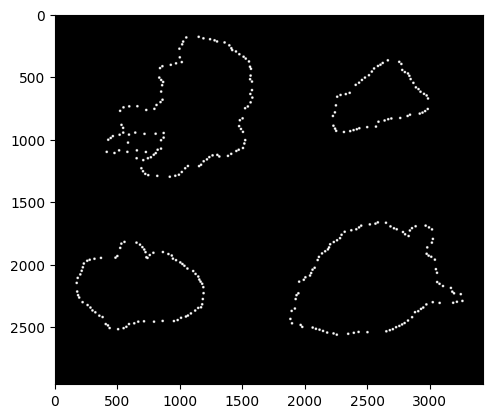

In [13]:
# Now, we will iterate through the points of the detected contours and extract the patches

cropped_img_size = int(256/2)
image_to_extract = images[0]
contour_image = np.zeros_like(image_to_extract)


image_num = 0

for c in selected_contours:

   i = 0
   points = []
   
   for point in c:

      i+=1
      
      if i == 15:

         point = point.squeeze()
         contour_image = cv2.circle(contour_image, point, radius=10, color=(255, 255, 255), thickness=-1)

         points.append(point)

         i=0 
   
   for point in points:

      x = point[0]
      y = point[1]

      try:

         new_img = image_to_extract[x-cropped_img_size:x+cropped_img_size,y-cropped_img_size:y+cropped_img_size]

         if new_img.shape == (cropped_img_size*2, cropped_img_size*2):

            filename = "B22_25_HP_image_0_patch-"+str(image_num)+".jpg"
            cv2.imwrite(filename, new_img)
                
            image_num+=1 

      except:
         print("An exception occurred")
   
   
plt.imshow(contour_image, cmap='gray')
plt.show() 


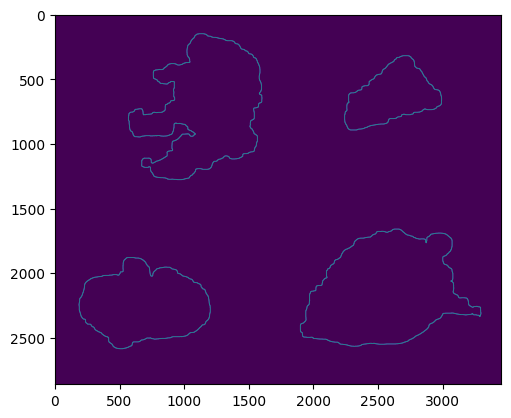

In [14]:
# Now let's repeat the process for the other two images

blurred = cv2.blur(images[1], (60,60)) # First, reduce noise...

adjusted_image = cv2.equalizeHist(blurred, )

_, binary_image = cv2.threshold(adjusted_image, 180, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = [contour for contour in contours if cv2.contourArea(contour) > 80000 and cv2.contourArea(contour) < 2500000] # Only select the big ones

contour_image = np.zeros_like(binary_image)
cv2.drawContours(contour_image, selected_contours, -1, (255, 0, 255), 2)  

plt.imshow(contour_image)
plt.show()

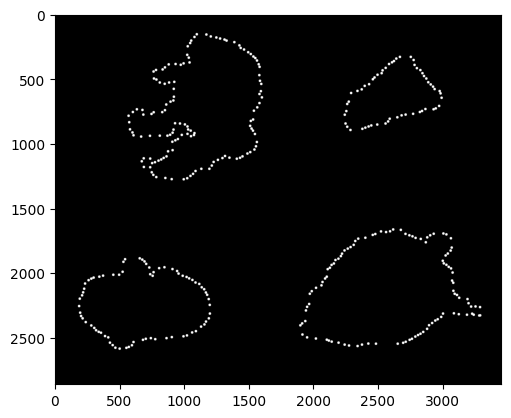

In [15]:
# Now, we will iterate through the points of the detected contours and extract the patches

cropped_img_size = int(256/2)
image_to_extract = images[1]
contour_image = np.zeros_like(image_to_extract)

image_num = 0

for c in selected_contours:

   i = 0
   points = []
   
   for point in c:

      i+=1
      
      if i == 15:

         point = point.squeeze()
         contour_image = cv2.circle(contour_image, point, radius=10, color=(255, 255, 255), thickness=-1)

         points.append(point)

         i=0 
   
   for point in points:

      x = point[0]
      y = point[1]

      try:

         new_img = image_to_extract[x-cropped_img_size:x+cropped_img_size,y-cropped_img_size:y+cropped_img_size]

         if new_img.shape == (cropped_img_size*2, cropped_img_size*2):

            filename = "B22_25_HP_image_1_patch-"+str(image_num)+".jpg"
            cv2.imwrite(filename, new_img)
                
            image_num+=1 

      except:
         print("An exception occurred")
   
   
plt.imshow(contour_image, cmap='gray')
plt.show() 


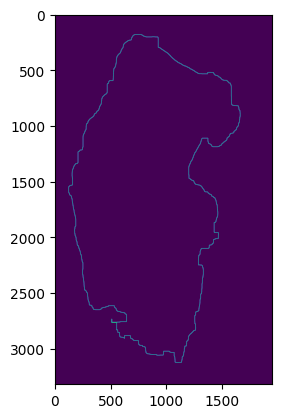

In [16]:
# Now for the last image

blurred = cv2.blur(images[2], (60,60)) # First, reduce noise...

adjusted_image = cv2.equalizeHist(blurred, )

_, binary_image = cv2.threshold(adjusted_image, 200, 255, cv2.THRESH_BINARY)

opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

not_binary_thres = cv2.bitwise_not(opening)

contours, hierarchy = cv2.findContours(not_binary_thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = [contour for contour in contours if cv2.contourArea(contour) > 100000] # Only select the big ones

contour_image = np.zeros_like(binary_image)
cv2.drawContours(contour_image, selected_contours, -1, (255, 0, 255), 2)  

plt.imshow(contour_image)
plt.show()

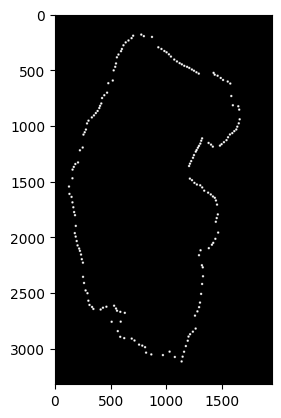

In [17]:
# Now, we will iterate through the points of the detected contours and extract the patches

cropped_img_size = int(256/2)
image_to_extract = images[2]
contour_image = np.zeros_like(image_to_extract)

image_num = 0

for c in selected_contours:

   i = 0
   points = []
   
   for point in c:

      i+=1
      
      if i == 15:

         point = point.squeeze()
         contour_image = cv2.circle(contour_image, point, radius=10, color=(255, 255, 255), thickness=-1)

         points.append(point)

         i=0 
   
   for point in points:

      x = point[0]
      y = point[1]

      try:

         new_img = image_to_extract[x-cropped_img_size:x+cropped_img_size,y-cropped_img_size:y+cropped_img_size]

         if new_img.shape == (cropped_img_size*2, cropped_img_size*2):

            filename = "B22_25_HP_image_2_patch-"+str(image_num)+".jpg"
            cv2.imwrite(filename, new_img)
                
            image_num+=1 
    
      except:
         print("An exception occurred")
   
   
plt.imshow(contour_image, cmap='gray')
plt.show() 